# Curse of dimensionality

A slightly modified exercise from ESLII, around page 26. The idea is to create a non-linear function in really high-D, and then try to fit it, using either 1NN (one nearest neighbor), or linear regression. The prediction is that in very-high-D, your nearest neighbor would actually be quite far.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [42]:
class const():
    max_dim = 100
    npoints = 200 # To avoid degenerate cases at the end, npoints should be >> max_dim
    epsilon = 0.01
    n_experiments = 100

### First let's try it manually for 2D

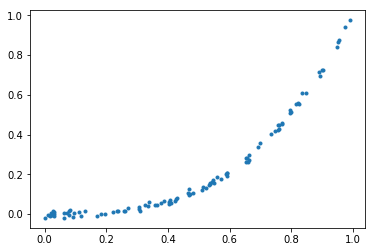

In [38]:
# Create a slightly noisy y(x)
dim = 2
x = np.random.uniform(size=(const.npoints,dim))
y = x[:,0]**3 + np.random.normal(size=(const.npoints))*const.epsilon # Only depends on one coordinate, but prob doesn't matter
plt.plot(x[:,0],y,'.');

In [39]:
model = LinearRegression()
model.fit(x , y)
x0 = np.zeros(shape=(1,2))
model.predict(x0)

array([-0.16777912])

In [40]:
# Try KNN (for k=1, so 1NN):
model = KNeighborsRegressor(n_neighbors = 1)
model.fit(x , y)
model.predict(x0)

array([-0.00852773])

### Now combining it all together

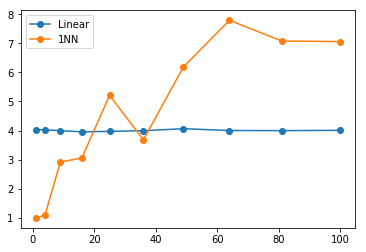

In [43]:
models = [LinearRegression() , KNeighborsRegressor(n_neighbors = 1)]
model_names = ['Linear', '1NN']

dim_list = np.arange(1,np.ceil(np.sqrt(const.max_dim))+1)**2 # Nice fast-growing list to go from 1 to const.max_dim
dim_list = dim_list.astype(int).tolist()                     # Cast to integer list
ndim = len(dim_list)
result = np.zeros(shape=(ndim , const.n_experiments))
dim_history = np.zeros(ndim)
ax = plt.axes();
for imodel in range(len(models)):
    model = models[imodel]
    for idim in range(ndim):
        dim = dim_list[idim]
        x0 = np.zeros(shape=(1,dim))
        for i_exp in range(const.n_experiments):
            x = np.random.uniform(low=-1, high=1, size=(const.npoints , dim))
            y = (1+x[:,0])**3 + np.random.normal(size=(const.npoints))*const.epsilon
            model.fit(x , y)        
            result[idim,i_exp] = model.predict(x0)**2

    ax.plot(dim_list , np.mean(result,axis=1) , '-o' , label=model_names[imodel]);
    #plt.show()
    
ax.legend();

The higher the dimensionality, the more weird 1NN is, as nearest neighbors are increasily "shifted" from the innards of a sphere towards its shell.